In [1]:
import numpy as np
import pandas as pd

In [2]:
%config Completer.use_jedi = False

In [1]:
!nvidia-smi

Wed Aug 23 20:24:07 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
torch.__version__

'2.0.1+cu118'

In [3]:
# ! [ -e /content ] && pip install -Uqq fastai

In [4]:
import fastai
fastai.__version__

'2.7.12'

In [5]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [7]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.70G/2.70G [01:09<00:00, 42.7MB/s]
100% 2.70G/2.70G [01:09<00:00, 41.8MB/s]


In [8]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [9]:
data_path = '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

In [10]:
tfms_for_item = RandomResizedCrop(128, min_scale = 0.35)
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]

data = ImageDataLoaders.from_folder(data_path, item_tfms = tfms_for_item,
                                    batch_tfms = tfms_for_batch,
                                    valid_pct = 0.15, shuffle = True)

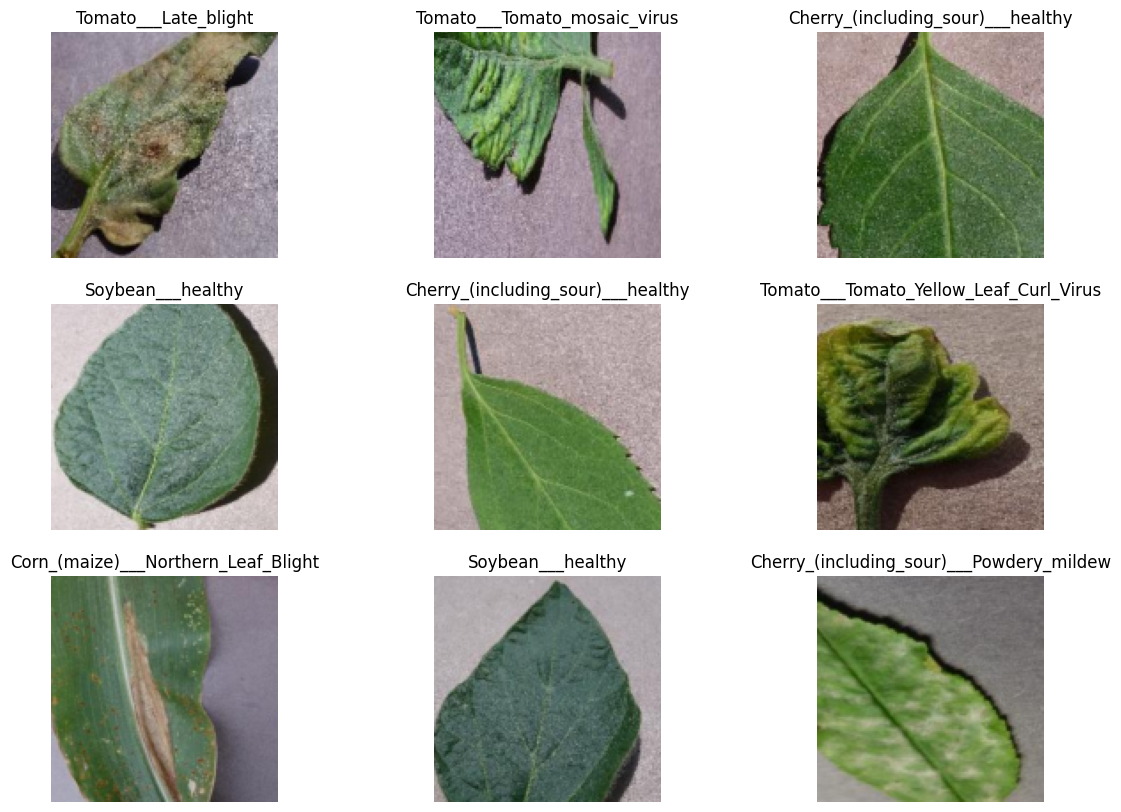

In [11]:
data.show_batch(figsize = (14, 10))

In [12]:
print('Number of Classes', data.c)

Number of Classes 38


In [14]:
model = cnn_learner(data, resnet101, metrics = accuracy, model_dir = '/tmp/model/')

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe

In [16]:
model.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 64 x 64   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 32 x 32   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 32 x 32  
Conv2d                                    16384      False     
BatchNorm2d                        

SuggestedLRs(valley=0.0010000000474974513)

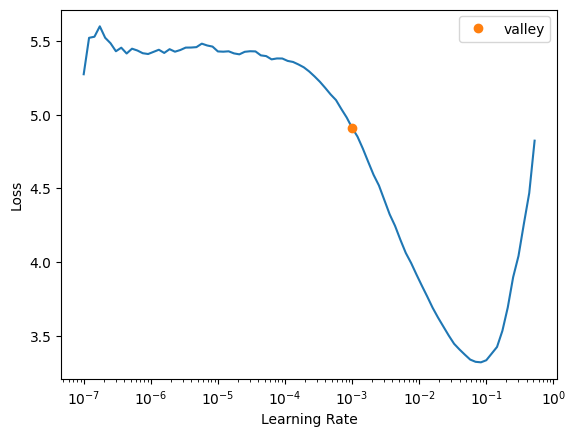

In [15]:
model.lr_find()

In [17]:
model.fit_one_cycle(5, 0.001)

In [18]:
model.save('my_model.pkl')

Path('/tmp/model/my_model.pkl.pth')

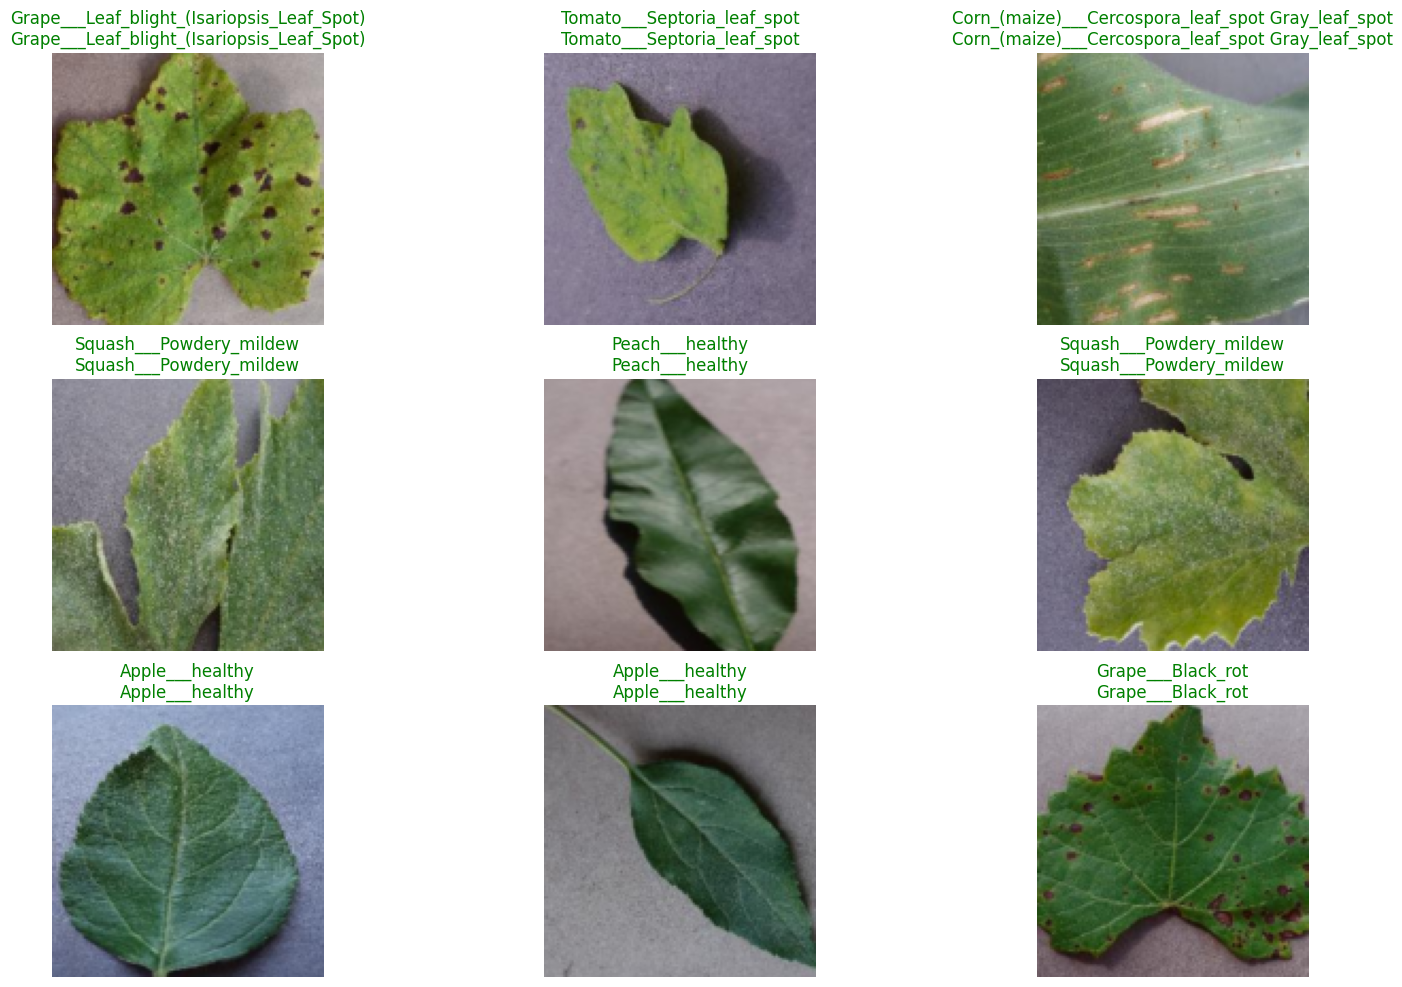

In [22]:
model.show_results(figsize = (18, 12))

In [23]:
interp = Interpretation.from_learner(model)

In [26]:
interp2 = ClassificationInterpretation.from_learner(model)

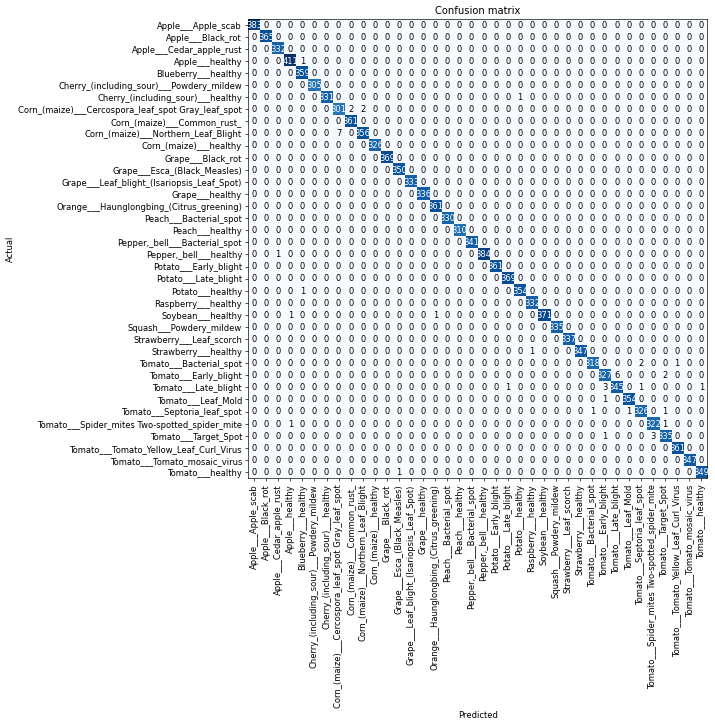

In [27]:
interp2.plot_confusion_matrix(figsize = (12, 12), dpi=60)

In [28]:
interp2.most_confused(min_val=2)

[('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  7),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 6),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 3),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 3),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Common_rust_',
  2),
 ('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  2),
 ('Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 2),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 2)]

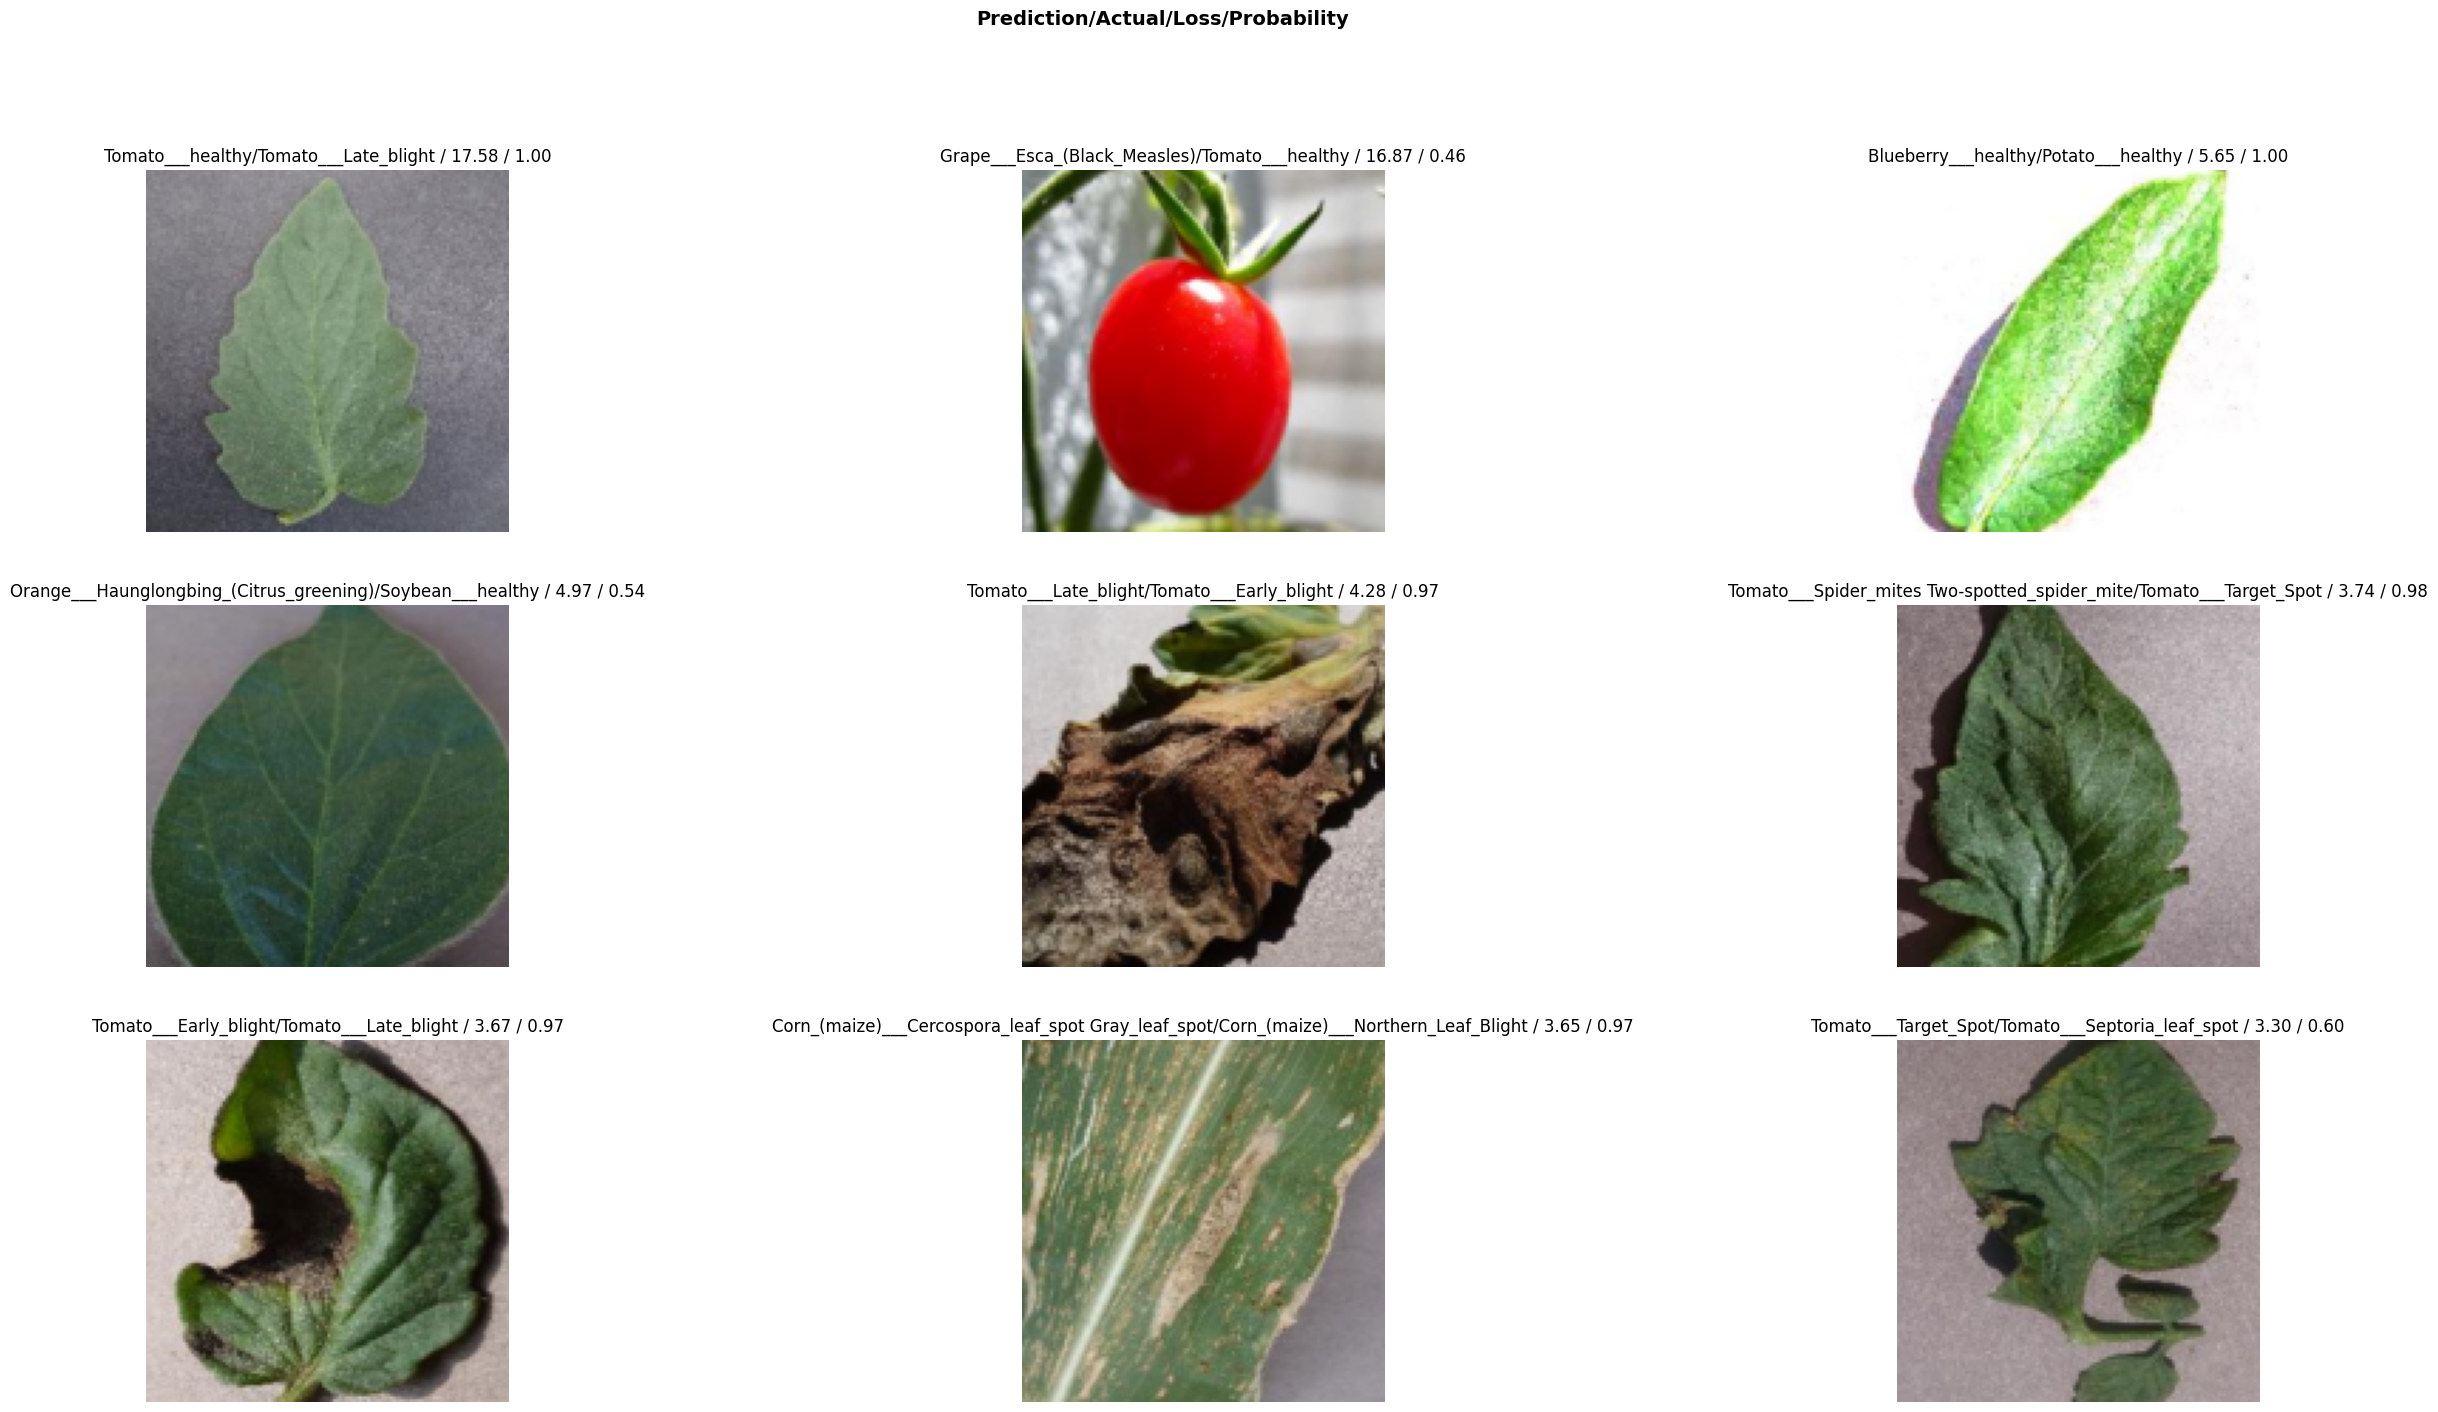

In [31]:
interp.plot_top_losses(9, figsize = (32, 16))